##### Libraries

In [1]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('scroll_down/main')
utils.load_extension('hide_input/main')
utils.load_extension('jupyter-js-widgets/extension')


<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
import seaborn as sns
import numpy as np

from pandas_profiling import ProfileReport

from sklearn.linear_model import Lasso

from category_encoders.one_hot import OneHotEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.cat_boost import CatBoostEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelBinarizer
from sklearn.metrics import mean_absolute_error, classification_report, roc_auc_score

from sklearn.tree import DecisionTreeRegressor, plot_tree
from catboost import CatBoostRegressor, CatBoostClassifier

import shap

from matplotlib import rcParams

rcParams["axes.labelsize"] = 14
rcParams["xtick.labelsize"] = 12
rcParams["ytick.labelsize"] = 12

rcParams["figure.figsize"] = 16, 8

In [3]:
def plot_feature_importance(columnas,model_features,columns_ploted=10,model_name='Catboost'):
    '''
    This method is yet non-tested
    
    This function receives a set of columns feeded to a model, and the importance of each of feature.
    Returns a graphical visualization
    
    Call it fot catboost pipe example:
    plot_feature_importance(pipe_best_estimator[:-1].transform(X_tr).columns,pipe_best_estimator.named_steps['cb'].get_feature_importance(),20)
    
    Call it for lasso pipe example:
    plot_feature_importance(pipe_best_estimator[:-1].transform(X_tr).columns,np.array(pipe_best_estimator.named_steps['clf'].coef_.squeeze()),20)
    '''

    feature_importance = pd.Series(index = columnas, data = np.abs(model_features))
    n_selected_features = (feature_importance>0).sum()
    print('{0:d} features, reduction of {1:2.2f}%'.format(n_selected_features,(1-n_selected_features/len(feature_importance))*100))
    plt.figure()
    feature_importance.sort_values().tail(columns_ploted).plot(kind = 'bar', figsize = (18,6))
    plt.title('Feature Importance for {}'.format(model_name))
    plt.show()


In [4]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [5]:
file_path =  os.path.abspath(os.path.join('' ,"../..")) + '/Data/DHS-PROCESSED-CLEAN.csv'

In [8]:
df = pd.read_csv(file_path)

In [ ]:
dhs.join(osm,on='cluster??')

,DHSCLUST,Wealth,Wealth Index,Toilet Facility,Roof Material,Electricity,Cooking Fuel,Drinking Water,URBAN_RURA,DHSREGNA,ADM1NAME,LATNUM,LONGNUM,geometry,UN_Population_Density_2015,Population_Density
0,10001,richer,107648.636364,Flush,Metal,yes,Petroleum,Piped Water,U,South Andaman,Andaman & Nicobar Islands,11.670645,92.745799,POINT (92.74579928369999 11.6706448114),371.654433,Average
1,10002,middle,25279.409091,Flush,Metal,yes,Petroleum,Piped Water,R,Nicobars,Andaman & Nicobar Islands,9.143844,92.826752,POINT (92.8267516352 9.143843815149999),129.322150,Very Low
2,10003,middle,4725.681818,Flush,Metal,yes,Wood/Straw,Piped Water,R,Nicobars,Andaman & Nicobar Islands,9.212246,92.753633,POINT (92.75363284469999 9.212245586050001),129.322140,Very Low
3,10004,middle,17484.909091,Flush,Metal,yes,Wood/Straw,Piped Water,R,Nicobars,Andaman & Nicobar Islands,9.165413,92.742696,POINT (92.74269589719999 9.165413484529999),129.322139,Very Low
4,10005,middle,25083.454545,Flush,Metal,yes,Petroleum,Piped Water,R,Nicobars,Andaman & Nicobar Islands,8.307356,93.093792,POINT (93.0937924407 8.30735625773),20.672477,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,360477,richer,86772.000000,Flush,Cement,yes,Petroleum,Piped Water,U,Warangal,Telangana,17.990663,79.603454,POINT (79.6034535619 17.9906633529),4013.736213,Very High
28378,360479,middle,-5374.636364,Flush,Cement,yes,Petroleum,Bottled,R,Warangal,Telangana,17.571664,79.952492,POINT (79.95249230260001 17.5716643631),424.379683,Average
28379,360480,middle,2390.529412,Flush,Cement,yes,Petroleum,Bottled,R,Warangal,Telangana,17.939231,79.512509,POINT (79.5125089779 17.9392308581),1705.324199,Very High
28380,360481,richer,93821.086957,Flush,Cement,yes,Petroleum,Piped Water,U,Hyderabad,Telangana,17.420175,78.491013,POINT (78.4910125601 17.4201745103),15549.943750,Very High


In [6]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [7]:
#profile.to_file("DHS_EDA_report.html")

## Modeling

In [8]:
cols_drop = [
    "DHSCLUST",
    "Wealth",
    "Wealth Index",
    "ADM1NAME",
    "LATNUM",
    "LONGNUM",
    "geometry",
    "DHSREGNA",
    "UN_Population_Density_2015",
]

scaler = MinMaxScaler()
df[["UN_Population_Density_2015"]] = scaler.fit_transform(
    df[["UN_Population_Density_2015"]]
)

X = df.drop(columns=cols_drop)
y = df[["Wealth Index"]]

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


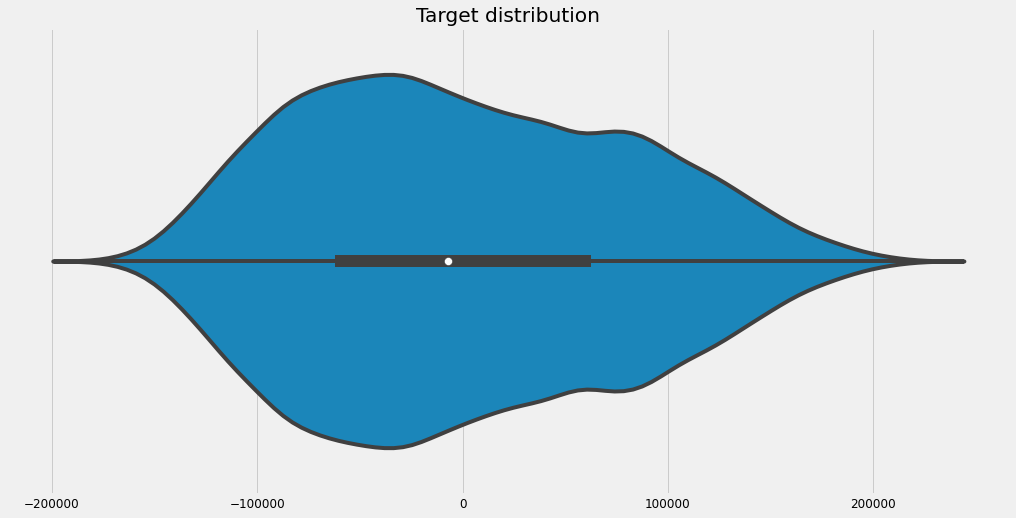

In [9]:
plt.figure()
plt.title('Target distribution')
sns.violinplot(y.values)
plt.show()

In [10]:
X.columns

Index(['Toilet Facility', 'Roof Material', 'Electricity', 'Cooking Fuel',
       'Drinking Water', 'URBAN_RURA', 'Population_Density'],
      dtype='object')

In [11]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y)

### Regression

#### Linear OHE

In [12]:
model = Lasso()
enc = OneHotEncoder(use_cat_names=True)

In [13]:
pipe = Pipeline([('enc',enc), ('model',model)])

In [14]:
pipe.fit(X_tr,y_tr)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Objective did not converge. You might want to increase the number of iterations. Duality gap: 669542115827.0312, tolerance: 13411986499.585243


Pipeline(steps=[('enc',
                 OneHotEncoder(cols=['Toilet Facility', 'Roof Material',
                                     'Electricity', 'Cooking Fuel',
                                     'Drinking Water', 'URBAN_RURA',
                                     'Population_Density'],
                               use_cat_names=True)),
                ('model', Lasso())])

In [15]:
mean_absolute_error(pipe.predict(X_te),y_te)

28218.010273169446

39 features, reduction of 9.30%


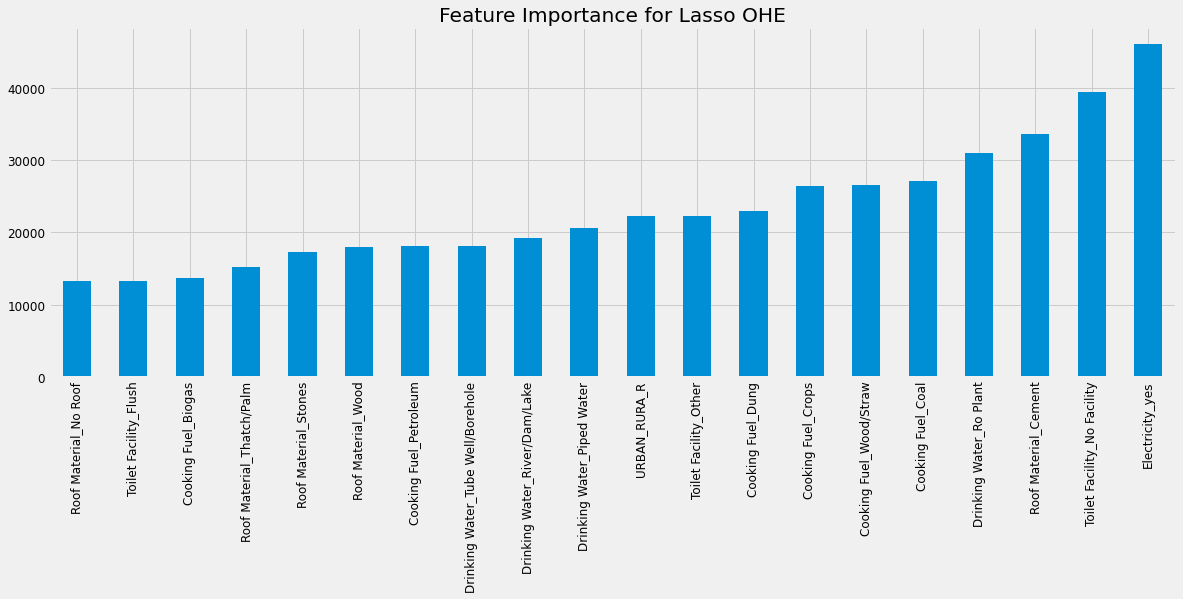

In [16]:
plot_feature_importance(
    pipe[:-1].transform(X_tr).columns,
    np.array(pipe.named_steps["model"].coef_.squeeze()),
    20,model_name='Lasso OHE'
)

#### Linear TE

In [17]:
model = Lasso()
enc = CatBoostEncoder()

pipe = Pipeline([('enc',enc), ('model',model)])

pipe.fit(X_tr,y_tr)

Pipeline(steps=[('enc',
                 CatBoostEncoder(cols=['Toilet Facility', 'Roof Material',
                                       'Electricity', 'Cooking Fuel',
                                       'Drinking Water', 'URBAN_RURA',
                                       'Population_Density'])),
                ('model', Lasso())])

In [18]:
mean_absolute_error(pipe.predict(X_te),y_te)

28917.519928944545

7 features, reduction of 0.00%


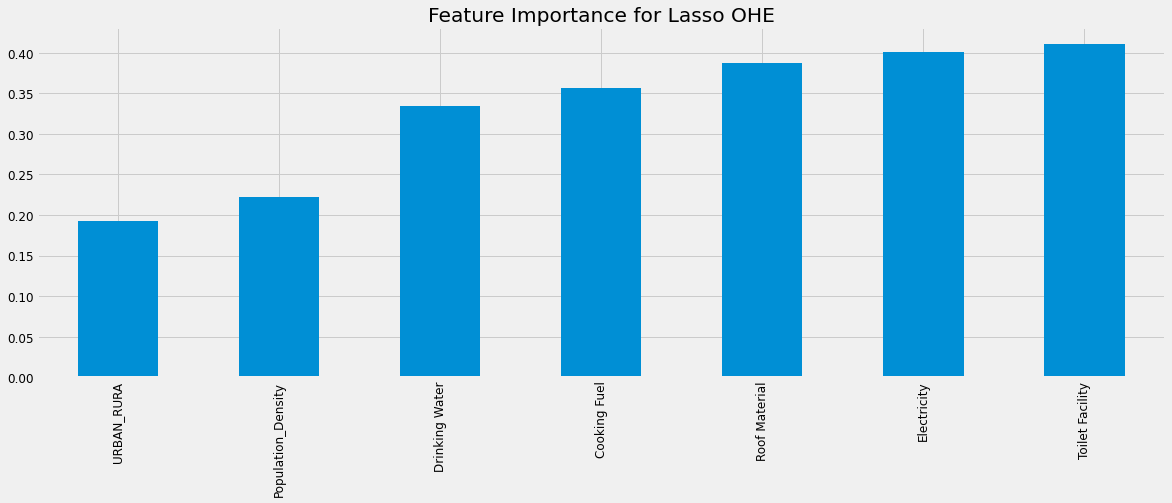

In [19]:
plot_feature_importance(
    pipe[:-1].transform(X_tr).columns,
    np.array(pipe.named_steps["model"].coef_.squeeze()),
    20,model_name='Lasso OHE'
)

#### Decision Tree TE

In [20]:
model = DecisionTreeRegressor(max_depth=5)
enc = CatBoostEncoder()

pipe = Pipeline([('enc',enc), ('model',model)])

pipe.fit(X_tr,y_tr)

Pipeline(steps=[('enc',
                 CatBoostEncoder(cols=['Toilet Facility', 'Roof Material',
                                       'Electricity', 'Cooking Fuel',
                                       'Drinking Water', 'URBAN_RURA',
                                       'Population_Density'])),
                ('model', DecisionTreeRegressor(max_depth=5))])

In [21]:
mean_absolute_error(pipe.predict(X_te),y_te)

28539.49134473002

In [22]:
pipe.named_steps["model"]

DecisionTreeRegressor(max_depth=5)

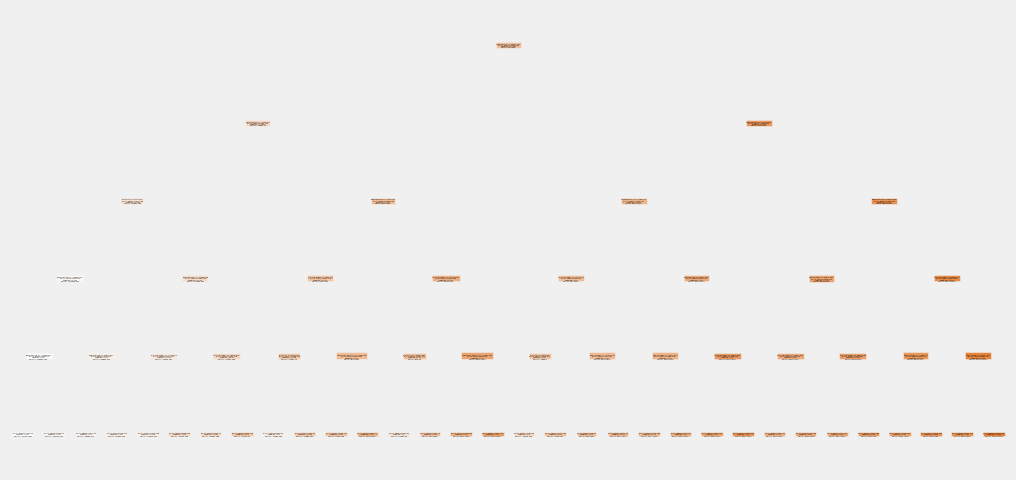

In [23]:
plt.figure()
plot_tree(
    pipe.named_steps["model"],
    max_depth=5,
    feature_names=X_tr.columns,
    filled=True,
)
plt.savefig('tree_te.svg',format='svg')
plt.show()

#### Decision Tree OHE

In [24]:
model = DecisionTreeRegressor(max_depth=8)
enc = OneHotEncoder()
pipe = Pipeline([('enc',enc), ('model',model)])

pipe.fit(X_tr,y_tr)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


Pipeline(steps=[('enc',
                 OneHotEncoder(cols=['Toilet Facility', 'Roof Material',
                                     'Electricity', 'Cooking Fuel',
                                     'Drinking Water', 'URBAN_RURA',
                                     'Population_Density'])),
                ('model', DecisionTreeRegressor(max_depth=8))])

In [25]:
mean_absolute_error(pipe.predict(X_te),y_te)

27066.93619048585

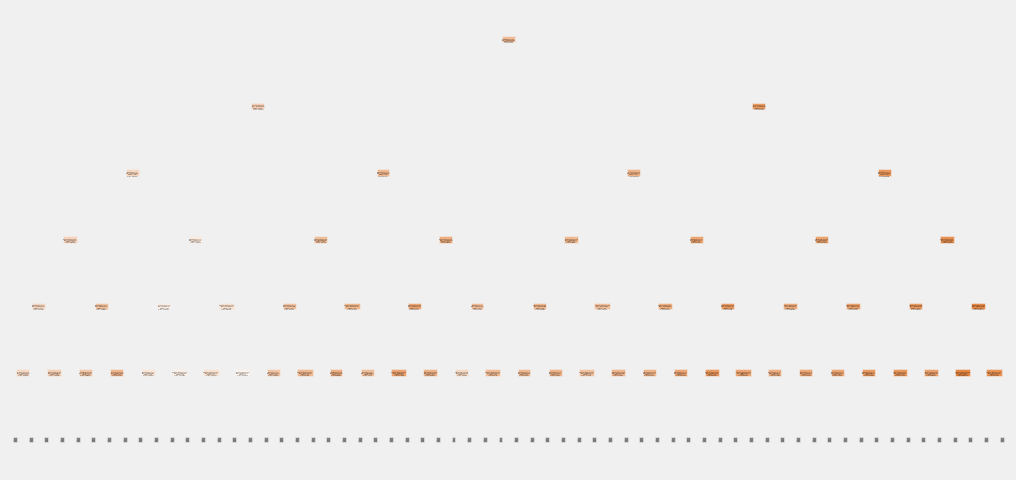

In [26]:
plt.figure()
plot_tree(
    pipe.named_steps["model"],
    max_depth=5,
    feature_names=pipe[:-1].transform(X_tr).columns,
    filled=True,
)
plt.savefig('tree_ohe.svg',format='svg')
plt.show()

#### Catboost TE

In [27]:
model = CatBoostRegressor(iterations=200,verbose=0)
enc = CatBoostEncoder()
pipe = Pipeline([('enc',enc), ('model',model)])

pipe.fit(X_tr,y_tr)

Pipeline(steps=[('enc',
                 CatBoostEncoder(cols=['Toilet Facility', 'Roof Material',
                                       'Electricity', 'Cooking Fuel',
                                       'Drinking Water', 'URBAN_RURA',
                                       'Population_Density'])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7ff6f5f9c970>)])

In [28]:
mean_absolute_error(pipe.predict(X_te),y_te)

26607.952087940146

7 features, reduction of 0.00%


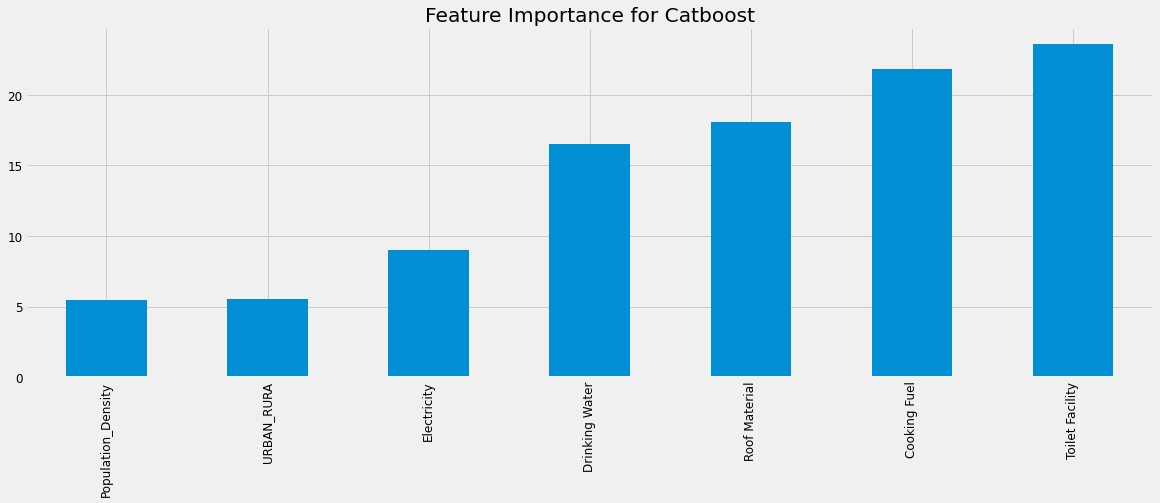

In [29]:
plot_feature_importance(
    pipe[:-1].transform(X_tr).columns,
    pipe.named_steps["model"].get_feature_importance(),
    20,
)

In [30]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(pipe.named_steps["model"])
shap_values = explainer.shap_values(pipe[:-1].transform(X_tr))

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

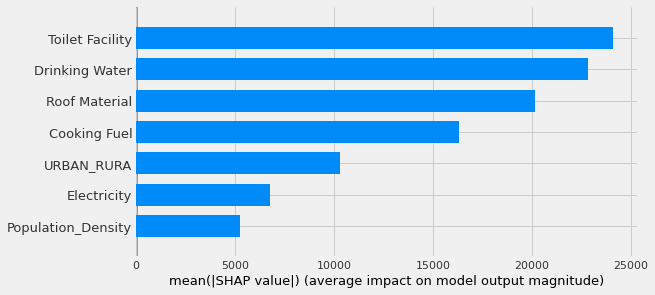

In [31]:
shap.summary_plot(shap_values, X_te, plot_type="bar")

## Classification

In [49]:
X = df.drop(columns=cols_drop)
y = df[["Wealth"]]

dic = {"richest": 1, "richer": 2, "middle": 3, "poorer": 4, "poorest": 5}
y = y.Wealth.map(dic)

X_tr,X_te,y_tr,y_te = train_test_split(X,y)

#### Catboost TE

In [50]:
model = CatBoostRegressor(iterations=200,verbose=0)
enc = CatBoostEncoder()
pipe = Pipeline([('enc',enc), ('model',model)])

pipe.fit(X_tr,y_tr)

Pipeline(steps=[('enc',
                 CatBoostEncoder(cols=['Toilet Facility', 'Roof Material',
                                       'Electricity', 'Cooking Fuel',
                                       'Drinking Water', 'URBAN_RURA',
                                       'Population_Density'])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7ff6fac0d280>)])

In [51]:
mean_absolute_error(pipe.predict(X_te),y_te)

0.5336309743987098

In [69]:
preds = np.round(pipe.predict(X_te))
dic_rev = {v: k for k, v in dic.items()}
preds = pd.DataFrame(preds,columns=['predictions'])
y_test = preds.predictions.map(dic_rev)

In [78]:
print(classification_report(y_test,[dic_rev[k] for k in y_te]))

              precision    recall  f1-score   support

      middle       0.47      0.44      0.45      1289
      poorer       0.62      0.48      0.54      2037
     poorest       0.59      0.85      0.70      1341
      richer       0.61      0.46      0.52      1578
     richest       0.53      0.76      0.62       851

    accuracy                           0.57      7096
   macro avg       0.57      0.60      0.57      7096
weighted avg       0.58      0.57      0.56      7096



In [92]:
multiclass_roc_auc_score(y_test,[dic_rev[k] for k in y_te],average=None)

array([0.66504772, 0.68116049, 0.85900462, 0.68713442, 0.83316929])

7 features, reduction of 0.00%


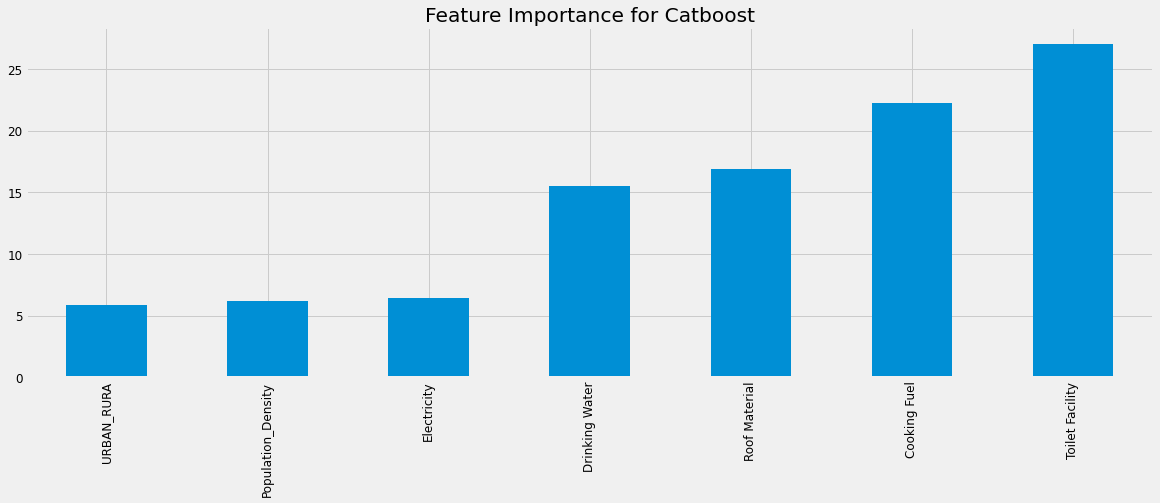

In [70]:
plot_feature_importance(
    pipe[:-1].transform(X_tr).columns,
    pipe.named_steps["model"].get_feature_importance(),
    20,
)

In [30]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(pipe.named_steps["model"])
shap_values = explainer.shap_values(pipe[:-1].transform(X_tr))

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

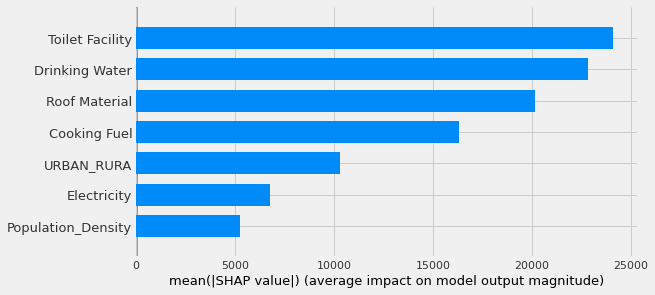

In [31]:
shap.summary_plot(shap_values, X_te, plot_type="bar")